# Confidence Intervals

### Random Sampling

In statistics, we work with a sample from a population as a means to make inference about a population. A confidence interval tells us a range of values where a particular population estimate of interest falls. It's a way to assess how accurate the true population estimate is likely to be. 

In [1]:
import random
from random import normalvariate
import numpy as np

In [2]:
# mean
mu = 0
# standard deviation
sigma = 1

# Create a population of 10000 random numbers that are normally distributed
Population = [random.normalvariate(mu, sigma) for x in range(10000)]


In [3]:
len(Population)

10000

In [4]:
# sample 500 from population of 10000
Sample1 = random.sample(Population, 500)
Sample2 = random.sample(Population, 500)

In [5]:
np.mean(Sample1)

0.02414110326839583

In [6]:
np.std(Sample1)

1.0090352690075564

In [7]:
np.mean(Sample2)

0.06085358659677049

In [8]:
np.std(Sample2)

1.0022897009206457

A sampling distribution is the distribution of all possible estimates that would arise from a hypothetical repeated sampling.

In [9]:
# Calculate the mean for 100 random samples.
# Each sample pulls out 1000 observations from a Population of 10000.
means = [np.mean(random.sample(Population, 1000)) for x in range(100)]

np.mean(means)

0.003786394816383566

In [10]:
# Calculate the standard deviation for 100 random samples of 1000 from a Population of 10000.
standarddevs = [np.std(random.sample(Population, 1000)) for x in range(100)]

np.mean(standarddevs)

1.0005541809053933

In [11]:
# Normal Standard Distribution
mu = 0
sigma = 1
Observations = [random.normalvariate(mu, sigma) for x in range(100000)]

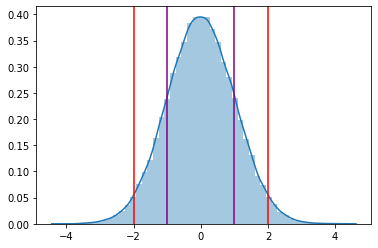

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(Observations)

plt.axvline(np.mean(Observations) + np.std(Observations), color = "purple")
plt.axvline(np.mean(Observations) - np.std(Observations), color = "purple")

plt.axvline(np.mean(Observations) + (np.std(Observations) * 2), color = "red")
plt.axvline(np.mean(Observations) - (np.std(Observations) * 2), color = "red")

### Example of Confidence Intervals

Say you have a target population of 10,000 people. You want to draw a sample size of 100 from the population. Of the 100 people that you surveyed, You found that 54 people said that they would go to their local city's zoo this year while 46 said that they would not.

In [14]:
N = 10000 # population size
n = 100 # sample size
p = 0.54  # 54% said that they would go to the zoo
# 1-p = 0.46  # 46% said that they would not go

If you did multiple samples, the sampling distribution will be normal (bell-shaped curve).  The mean of the sampling distribution will be the mean of the population distribution.

What is the probability that 0.54 is within 2 standard deviations of the mean? 

For normal distributions, approximately, 95% of the data is within 2 standard deviations. There is a 95% chance that our sample p is within 2 standard deviations.  There is a 95% probability that the true estimate p is within 2 standard deviations of the sample estimate p.

A key idea here is that if we don't have our true population p, then instead we can use the sample p.

In [15]:
# We will use sample p for our population p
# calculate standard error 
se_sample = (p*(1-p)/n)**0.5
se_sample

0.04983974317750845

You will have variation due to sampling due to difference in each sampling result.  A confidence interval tells you how accurate your estimate is likely to be. A confidence interval has a lower and upper bound that tells us where the population estimate falls. Similar samples will have low variation and will give you a smaller confidence interval.  A varied population will have high variation and will give you a larger confidence interval.

In [16]:
# lower bound confidence interval
ci_lower = 0.54 - 2*(se_sample)
print(ci_lower)

# upper bound confidence interval
ci_upper = 0.54 + 2*(se_sample)
print(ci_upper)

0.44032051364498315
0.6396794863550169


### Interpretation of Confidence Intervals

Interpretation: with 95% confidence, between 0.44 and 0.64 of people will visit their local zoo.

In [17]:
# calculate margin of error, standard error
margin_error = 2*se_sample
margin_error

0.0996794863550169

With repeated sampling, the sampling distribution will show that the true population p will be contained in the interval.  We will get multiple intervals that include the true population p, 95% of the time. Now, if you were to increase your sample size n, your confidence interval range will narrow.  It will also lower your margin of error.

Confidence intervals tells you the boundary so that it gives you a way to quantify the uncertainty of an estimate.  It is the bounds on an estimate of a population parameter. A smaller confidence interval means your estimate is better (more precise) than a larger confidence interval.

In [18]:
# Say you got 85 correct out of 100 and you have a 95% confidence interval

from statsmodels.stats.proportion import proportion_confint

lower, upper = proportion_confint(85, 100, 0.05)
print('lower=%.3f, upper=%.3f' % (lower, upper))

lower=0.780, upper=0.920


In [ ]:
# end